In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv('train_data.csv')

In [5]:
train.head()

,Unnamed: 0,Theme,Paragraph,Question,Answer_possible,Answer_text,Answer_start
0,2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,True,['2003'],[526]
1,6,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What album made her a worldwide known artist?,True,['Dangerously in Love'],[505]
2,7,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Who managed the Destiny's Child group?,True,['Mathew Knowles'],[360]
3,8,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyoncé rise to fame?,True,['late 1990s'],[276]
4,9,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What role did Beyoncé have in Destiny's Child?,True,['lead singer'],[290]


In [6]:
train.dtypes

Unnamed: 0          int64
Theme              object
Paragraph          object
Question           object
Answer_possible      bool
Answer_text        object
Answer_start       object
dtype: object

In [7]:
train['Theme'].nunique()

361

In [8]:
train['Paragraph'].nunique()

15555

In [9]:
train.shape

(75055, 7)

In [10]:
train['Answer_possible'].value_counts()

True     50125
False    24930
Name: Answer_possible, dtype: int64

In [11]:
train.count()

Unnamed: 0         75055
Theme              75055
Paragraph          75055
Question           75055
Answer_possible    75055
Answer_text        75055
Answer_start       75055
dtype: int64

In [12]:
train['Theme'].value_counts()

Queen_Victoria                                    607
New_York_City                                     563
American_Idol                                     525
Beyoncé                                           523
Frédéric_Chopin                                   490
                                                 ... 
Digestion                                          56
Animal                                             53
Letter_case                                        42
Race_and_ethnicity_in_the_United_States_Census     38
Pitch_(music)                                      22
Name: Theme, Length: 361, dtype: int64

In [13]:
train['Answer_possible'].map({True:1, False:0})

0        1
1        1
2        1
3        1
4        1
        ..
75050    0
75051    0
75052    0
75053    0
75054    0
Name: Answer_possible, Length: 75055, dtype: int64

In [14]:
df = train.groupby('Theme')

In [15]:
df['Theme'].value_counts()

Theme                                    Theme                                  
2008_Summer_Olympics_torch_relay         2008_Summer_Olympics_torch_relay           356
ASCII                                    ASCII                                      165
A_cappella                               A_cappella                                 198
Adolescence                              Adolescence                                215
Affirmative_action_in_the_United_States  Affirmative_action_in_the_United_States    306
                                                                                   ... 
Wood                                     Wood                                       230
Xbox_360                                 Xbox_360                                   188
Yale_University                          Yale_University                            313
YouTube                                  YouTube                                    235
Zhejiang                               

In [16]:
df1 = df['Answer_possible'].value_counts().to_frame()

In [17]:
df1

Answer_possible
Theme                            Answer_possible                 
2008_Summer_Olympics_torch_relay True                         356
ASCII                            True                          83
                                 False                         82
A_cappella                       False                        122
                                 True                          76
...                                                           ...
Yale_University                  True                         151
YouTube                          True                         123
                                 False                        112
Zhejiang                         True                         132
                                 False                        119

[591 rows x 1 columns]

In [18]:
i = train['Answer_text'][1]
list(i).count(" ")

2

In [19]:
s=[]
for i in train['Answer_text']:
  a = list(i).count(" ")+1
  s.append(a)
train['ans_len'] = s  

In [20]:
for i in range(len(train)):
  if train['Answer_possible'][i] == False:
    train['ans_len'][i]=0

C:\Users\ckred\AppData\Local\Temp\ipykernel_16508\3517648895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ans_len'][i]=0


In [21]:
train.sample(20)

,Unnamed: 0,Theme,Paragraph,Question,Answer_possible,Answer_text,Answer_start,ans_len
42427,74833,Child_labour,"In developing countries, with high poverty and...",What is the largest employer of child labour?,True,['agriculture'],[284],1
5608,9893,Iranian_languages,"In addition to Old Persian and Avestan, which ...",What language to Kurdish become?,False,[],[],0
53432,93683,Renewable_energy_commercialization,Hydroelectricity is the term referring to elec...,Hydroelectricity accounts for what percentage ...,True,['Hydroelectricity'],[0],1
48975,86047,PlayStation_3,CNET awarded PS3 Slim four out of five stars p...,How many of its own five stars did TechRadar a...,True,['four and a half'],[266],4
12100,22123,Classical_music,"Its written transmission, along with the vener...",How are performers expected to play a work due...,True,['in a way that realizes in detail the origina...,[149],13
39546,69039,Literature,Greek drama exemplifies the earliest form of d...,What was written for radio broadcast in 1838?,False,[],[],0
38635,67496,Switzerland,"In 2012, resident foreigners made up 23.3% of ...",Who were the largest single group of foreigner...,True,['Italians'],[126],1
20162,35041,Aircraft_carrier,A fleet carrier is intended to operate with th...,What capability does a fleet carrier offer?,True,['offensive'],[83],1
13787,25004,Guinea-Bissau,"Guinea-Bissau (i/ˈɡɪni bɪˈsaʊ/, GI-nee-bi-SOW)...",How many square miles is Guinea-Bissau?,True,"['13,948 sq mi']",[237],3
64448,113815,British_Isles,"By the Late Middle Ages, Great Britain was sep...",Since the Norman invasion who had feudal posse...,True,['the Pope'],[1065],2


In [22]:
train['ans_len'].value_counts()

0     24930
1     17288
2     12710
3      7581
4      3636
5      2352
6      1444
7      1077
8       798
9       532
10      439
11      400
12      325
13      254
14      218
15      205
17      142
16      134
18      109
19       90
20       81
22       74
21       66
23       60
24       36
25       31
26       20
27       15
28        5
30        2
29        1
Name: ans_len, dtype: int64

<AxesSubplot: >

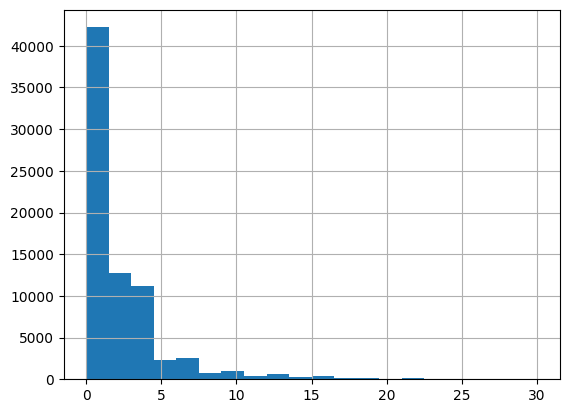

In [23]:
train["ans_len"].hist(bins=20)

<AxesSubplot: >

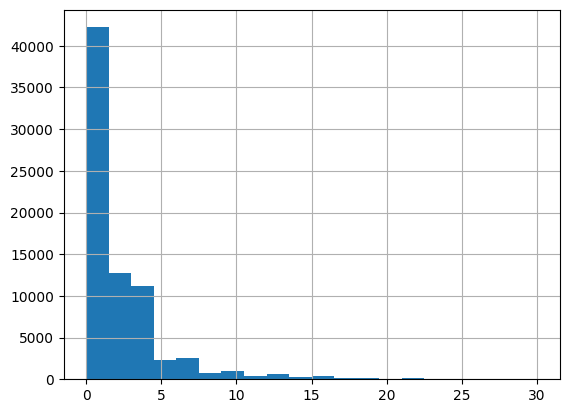

In [27]:
train['ans_len'].hist(bins=20)